In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
 
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

import torch 
import utils 

import pprint
import datasets

In [31]:
path = "./out/pipeline_results/GroundingDinoFull_SamWrapper_h_dataset_defaults_imagenet_val_5_09_17"


loader = datasets.ResultLoader(path) #instantiate loader from path the savefile
name = loader.load_config()["dataset"]["name"] # name of the dataset from config . can get other things here
dataset = (
    loader.load_same_dataset()
)  # prepare the same dataset is is in config for visuals
image_level_df = loader.load_image_level()

# different aggregations and such are in IoU_recall_visuals.ipynb, but this counts on having GT.
# here we only load individual images

In [33]:
# which images have many detections? above n?
n=20
SHOW=False

above_n = image_level_df[image_level_df["num_detections"] >= n]
print(f"number of images with >= {n} detections: {len(above_n)}")

for index, row in above_n.iterrows():
    image_id = row['image_id']
    num_detections = row['num_detections']
    print(f"\nImage ID: {image_id}, Number of Detections: {num_detections}")

    results = loader.load_results_per_image(idx=image_id)
    labels = results["labels"]
    boxes = results["boxes"]
    print(f"predicted classes: {dataset.catIDs_to_names(labels)}")
    print(f"predicted boxes: {boxes}")

    if SHOW:
        img = dataset[index]["image"] #retireve img from dataset
        utils.show

number of images with >= 20 detections: 5

Image ID: 0, Number of Detections: 99
predicted classes: [('green lizard', 'Lacerta viridis'), ('gar', 'garfish', 'garpike', 'billfish', 'Lepisosteus osseus'), ('ostrich', 'Struthio camelus'), ('ostrich', 'Struthio camelus'), ('leatherback turtle', 'leatherback', 'leathery turtle', 'Dermochelys coriacea'), ('frilled lizard', 'Chlamydosaurus kingi'), ('leatherback turtle', 'leatherback', 'leathery turtle', 'Dermochelys coriacea'), ('green lizard', 'Lacerta viridis'), ('leatherback turtle', 'leatherback', 'leathery turtle', 'Dermochelys coriacea'), 'None', 'None', ('African crocodile', 'Nile crocodile', 'Crocodylus niloticus'), ('African crocodile', 'Nile crocodile', 'Crocodylus niloticus'), 'None', ('African crocodile', 'Nile crocodile', 'Crocodylus niloticus'), 'None', 'None', ('frilled lizard', 'Chlamydosaurus kingi'), 'None', 'None', 'None', ('soup bowl',), ('African crocodile', 'Nile crocodile', 'Crocodylus niloticus'), 'None', 'None', 'Non


Image ID: 0, Number of Detections: 23
[array([  0,   0, 500, 375], dtype=int32)]


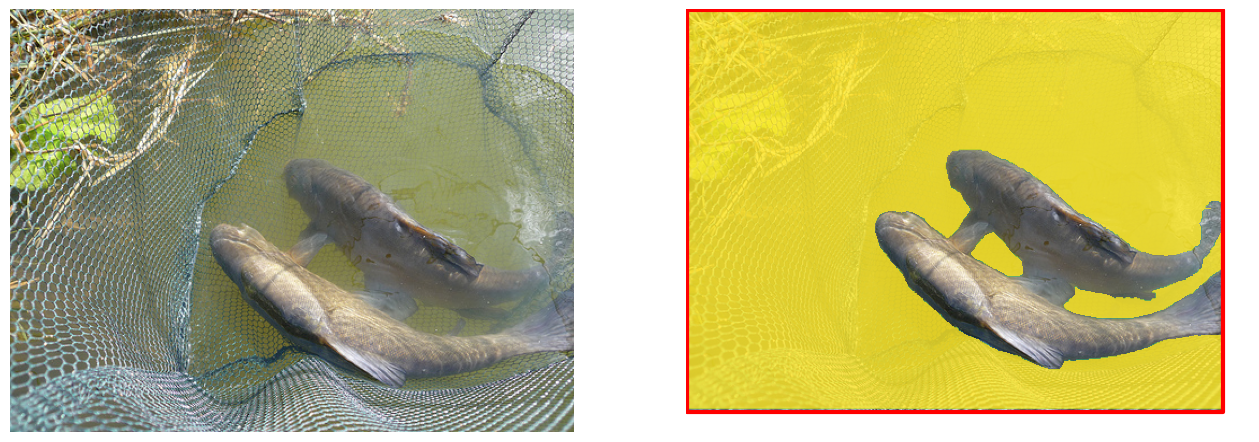


Image ID: 1, Number of Detections: 31
[array([500, 375, 500, 375], dtype=int32)]


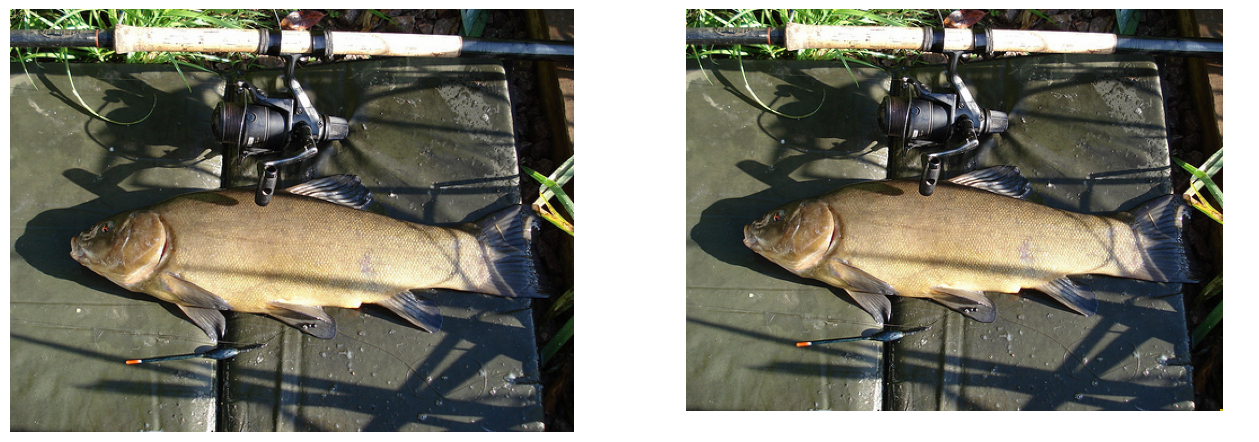


Image ID: 2, Number of Detections: 27
[array([  0,   0, 500, 375], dtype=int32)]


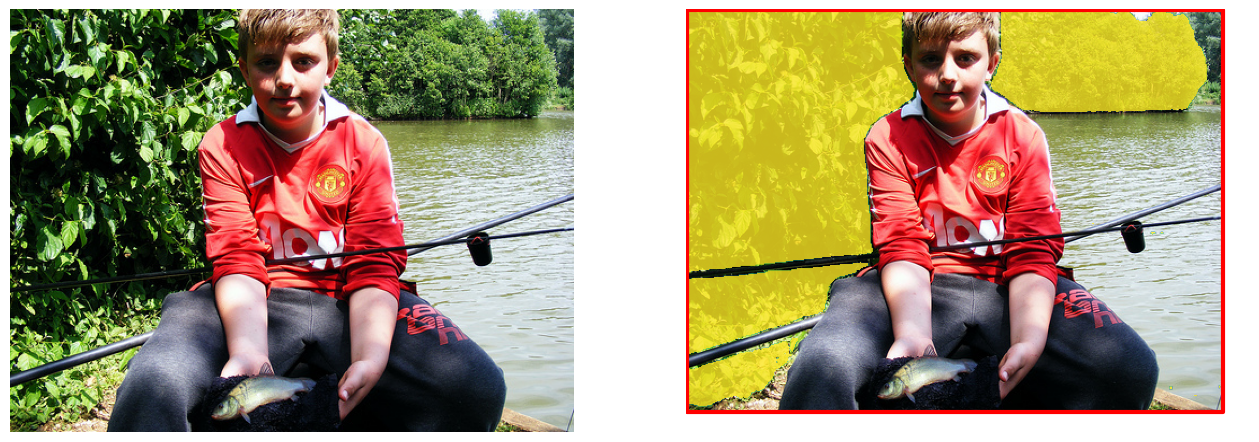


Image ID: 3, Number of Detections: 18
[array([500, 375, 500, 375], dtype=int32), array([500, 375, 500, 375], dtype=int32)]


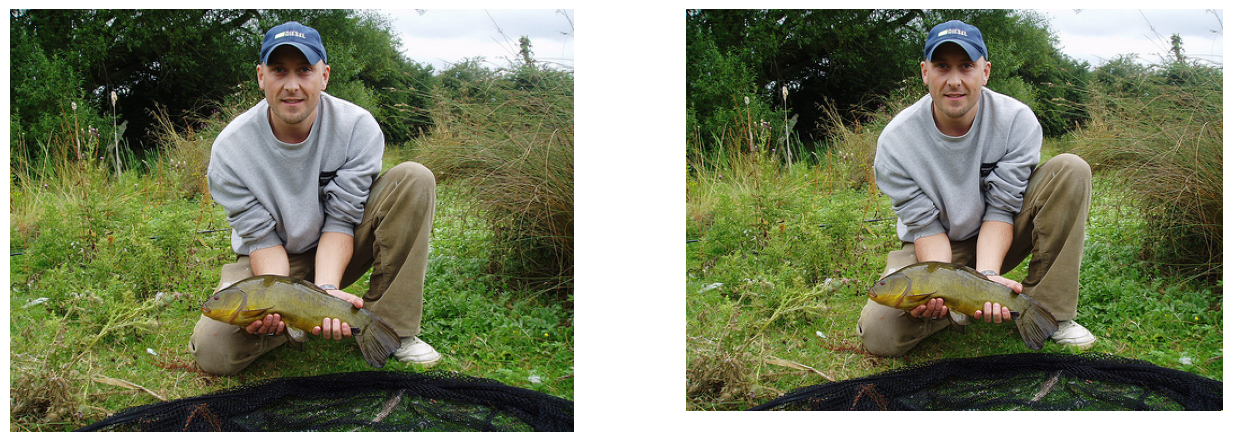


Image ID: 4, Number of Detections: 14
[array([500, 375, 500, 375], dtype=int32)]


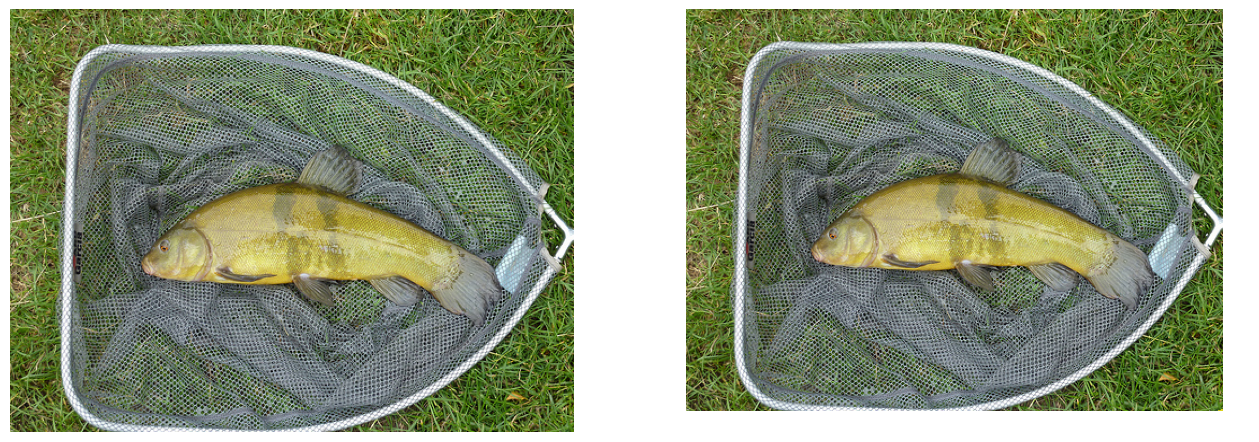

In [29]:
wanted = "gar"
SHOW = True

wanted_id = dataset.class_name_to_new_ID(wanted)
for index, row in image_level_df.iterrows():
    image_id = row["image_id"]
    num_detections = row["num_detections"]
    print(f"\nImage ID: {image_id}, Number of Detections: {num_detections}")

    results = loader.load_results_per_image(idx=image_id)
    labels = results["labels"]
    boxes = results["boxes"]
    masks = results["masks"]

    boxes_to_show = []
    masks_to_show = []
    for box, label,mask in zip(boxes, labels,masks):
        if label == wanted_id:
            boxes_to_show.append(box)
            masks_to_show.append(mask)
    print(boxes_to_show)
    if SHOW and len(boxes_to_show)!=0:
        img = dataset[index]["image"]  # retireve img from dataset
        utils.print_masks_boxes(image=img, boxes=boxes_to_show, masks=masks_to_show)

In [4]:
max_idx = len(dataset)
for i in range(max_idx):
    item = dataset[i]
    img = item['image'] 
    # gt = item['annotations'] # gt boxes, masks, and categories (empty in imagenet!!!)
    results = loader.load_results_per_image(idx = i) #loads detection_<i> from subfolder.
    print()

dict_keys(['image', 'annotations', 'index'])
dict_keys(['image', 'annotations', 'index'])
dict_keys(['image', 'annotations', 'index'])
dict_keys(['image', 'annotations', 'index'])
dict_keys(['image', 'annotations', 'index'])
dict_keys(['image', 'annotations', 'index'])
dict_keys(['image', 'annotations', 'index'])
dict_keys(['image', 'annotations', 'index'])
dict_keys(['image', 'annotations', 'index'])
dict_keys(['image', 'annotations', 'index'])
dict_keys(['image', 'annotations', 'index'])
dict_keys(['image', 'annotations', 'index'])
dict_keys(['image', 'annotations', 'index'])
dict_keys(['image', 'annotations', 'index'])
dict_keys(['image', 'annotations', 'index'])
dict_keys(['image', 'annotations', 'index'])
dict_keys(['image', 'annotations', 'index'])
dict_keys(['image', 'annotations', 'index'])
dict_keys(['image', 'annotations', 'index'])
dict_keys(['image', 'annotations', 'index'])
dict_keys(['image', 'annotations', 'index'])
dict_keys(['image', 'annotations', 'index'])
dict_keys(

KeyboardInterrupt: 